In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from task import Task

## Useful Functions

In [7]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
def make_results_table(episodes):    
    return [{x : [] for x in labels} for e in range(0, episodes)]
    

## Training my Agent:

In [ ]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import os
import tensorflow as tf

#Disable tensoflow warnings...
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

#num_episodes = 500
num_episodes = 30

results = make_results_table(num_episodes)

#Execution time limit
runtime = 5.                                    

#Starts at ground, fully stopped.
init_pose = np.array([0., 0., 10., 0., 0., 0.])   # initial pose (* 10m high)
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

#Target position
target_pos = np.array([0., 0., 20.])

task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task) 

rewards = []

for e in range(0, num_episodes):
    state = agent.reset_episode() # start a new episode
    rewards.append([])
    while True:
        rotor_speeds = agent.act(state) 
        next_state, reward, done = task.step(rotor_speeds)
        rewards[e].append(reward / task.action_repeat)
        agent.step(rotor_speeds, reward, next_state, done)
        state = next_state
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[e][labels[ii]].append(to_write[ii])
        if done:
            mr = np.mean(rewards[e])
            print("\rEpisode = {:4d}, mean reward = {:7.3f} max reward = {:7.3f}".format(
                e + 1, mr, np.max(rewards[e])), end="")
            break
    sys.stdout.flush()

Episode =   19, mean reward =   2.266 max reward =   2.272

## Plot the Rewards and Statistics

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

7 / 14


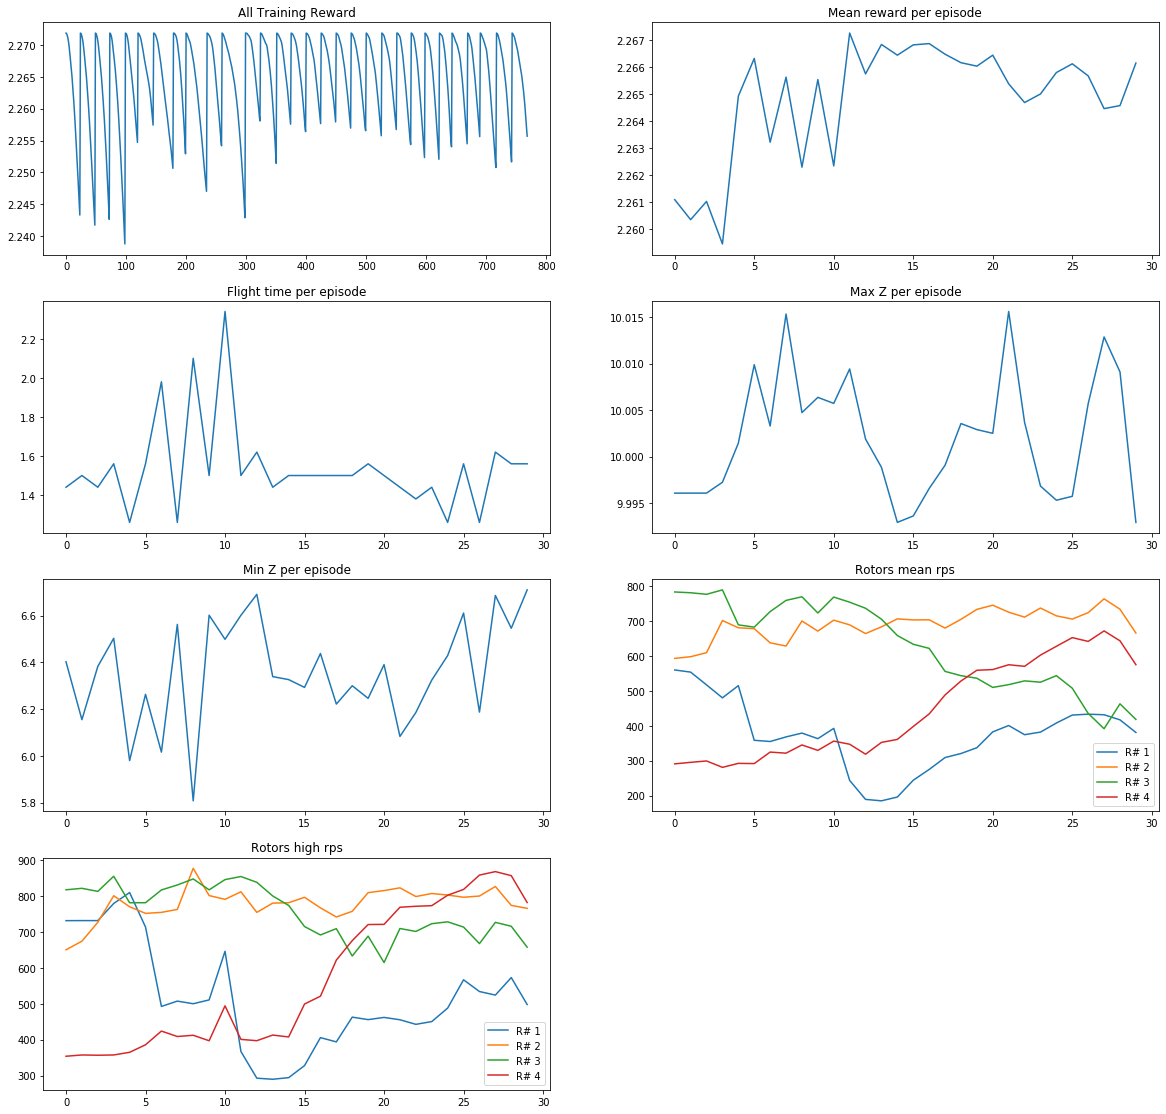

In [15]:
## TODO: Plot the rewards.
rows = 7
cols = 2
index = 0
%matplotlib inline
plt.figure(figsize=(20,5 * rows))


flatten = lambda l: [item for sublist in l for item in sublist]
all_rewards = flatten(rewards)
index += 1
plt.subplot(rows,cols,index)
plt.plot(all_rewards)
plt.title("All Training Reward")

maxtime = []
meanreward = []
max_z = []
min_z = []
mea_z = []
mean_rotor_s = [[],[],[],[]]
high_rotor_s = [[],[],[],[]]
for e in range(0, num_episodes):
    maxtime.append(max(results[e]['time']))
    max_z.append(max(results[e]['z']))
    min_z.append(min(results[e]['z']))
    mea_z.append(np.mean(results[e]['z']))
    mean_rotor_s[0].append(np.mean(results[e]['rotor_speed1']))
    mean_rotor_s[1].append(np.mean(results[e]['rotor_speed2']))
    mean_rotor_s[2].append(np.mean(results[e]['rotor_speed3']))
    mean_rotor_s[3].append(np.mean(results[e]['rotor_speed4']))
    high_rotor_s[0].append(max(results[e]['rotor_speed1']))
    high_rotor_s[1].append(max(results[e]['rotor_speed2']))
    high_rotor_s[2].append(max(results[e]['rotor_speed3']))
    high_rotor_s[3].append(max(results[e]['rotor_speed4']))    
    
    meanreward.append(np.mean(rewards[e]))
    
index += 1
plt.subplot(rows,cols,index)
plt.plot(meanreward)
plt.title("Mean reward per episode")    

index += 1    
plt.subplot(rows,cols,index)
plt.plot(maxtime)
plt.title("Flight time per episode")

index += 1
plt.subplot(rows,cols,index)
plt.plot(max_z, label='max z')
plt.title("Max Z per episode")
#plt.legend()

index += 1
plt.subplot(rows,cols,index)
plt.plot(mea_z, label='mean z')
plt.title("Min Z per episode")

index += 1
plt.subplot(rows,cols,index)
for rotor in range (0,4):    
    plt.plot(mean_rotor_s[rotor], label='R# {}'.format(rotor + 1))
plt.title("Rotors mean rps".format(rotor + 1))
plt.legend()

index += 1
plt.subplot(rows,cols,index)
for rotor in range (0,4):
    plt.plot(high_rotor_s[rotor], label='R# {}'.format(rotor + 1))
plt.title("Rotors high rps".format(rotor + 1))
plt.legend()

print(index,"/",rows * cols)
_ = plt.ylim()

## Single Run ( testing the agent's take-off capacity )

In [ ]:
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

state = agent.reset_episode()
fm = {'x':[],'y':[],'z':[]}      
while True:
        action = agent.act(state)
        fm['x'].append(task.sim.pose[0])
        fm['y'].append(task.sim.pose[1])
        fm['z'].append(task.sim.pose[2])
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        if done:
            break

## Flight Statistics

In [ ]:
%matplotlib inline
%matplotlib inline

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.title("Movement per axix (x,y,z)")
plt.legend()
_ = plt.ylim()

plt.subplot(2,2,2)
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.title("Velocity per axix (x,y,z)")
plt.legend()

plt.subplot(2,2,3)
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.title("Euler angles")
plt.legend()

plt.subplot(2,2,4)
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 r/s')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 r/s')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 r/s')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 r/s')
plt.title("RPS for each rotor")
plt.legend()

_ = plt.ylim()

## 3d agent´s flight path

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Change to %matplotlib inline if dont work
%matplotlib inline

fig = plt.figure(figsize = (14,8))
#plt.title("3D Flight path")
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(fm['x'], fm['y'], fm['z'])
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I used a function that rewards ascension over Z axis and slightly penalizes variations over the other axis:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R
    

start_pos = np.array([0., 10.])
target_pos = np.array([0., 20.])
delta = target_pos - start_pos

def reward_function(p, t):
    if p[1] < start_pos[1]:
        return - 1
    if(p[1] > t[1]):
        return (-1 * 0.3 * (p[1] - target_pos[1])) / delta[1]
    
    return (p[1] - start_pos[1] - 3 * np.sqrt(abs(p[0] - t[0])))/delta[1]
    
       
resolution = 200

def make_range(start, end, resolution):
    delta = end - start
    steps = delta/resolution
    return np.round(np.arange(start, end, steps), 2)

x_range = make_range(-10.0, 10.0, resolution)
z_range = make_range(40.0, 0.0, resolution)

R = map_function(reward_function, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used DDPG as suggested.

The final choice of the hyperparameters are :

Size of minibatch from experience replay memory = 64
Tau (soft target update rate) = 0.001
Learning rate for the actor = 0.001
Learning rate for the critic = 0.001
Gamma = 0.99
Capacity of experience replay memory = 1000000
Yes the final agent uses Neural Net arch.

Actor :

layers.Dense(units=32, activation='relu')(states)
layers.Dense(units=64, activation='relu')(net)
layers.Dense(units=32, activation='relu')(net)

Same as actor for the state pathway
        # Add hidden layer(s) for state pathway
        net_states = layers.Dense(units=32, activation='relu')(states)
        net_states = layers.Dense(units=64, activation='relu')(net_states)

        # Add hidden layer(s) for action pathway
        net_actions = layers.Dense(units=32, activation='relu')(actions)
        net_actions = layers.Dense(units=64, activation='relu')(net_actions)
        

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: